In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.calibration import LabelEncoder
import re
from sklearn import metrics

Importing and Loading Dataset

In [2]:
df1=pd.read_csv("D:\project 7\ResaleFlatPricesBasedonApprovalDate19901999.csv")
df2=pd.read_csv("D:\project 7\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df3=pd.read_csv("D:\project 7\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df4=pd.read_csv("D:\project 7\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df5=pd.read_csv("D:\project 7\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

In [3]:
df=pd.concat([df1,df2,df3,df4,df5],axis=0)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
180611,2024-05,YISHUN,EXECUTIVE,360,YISHUN RING RD,04 TO 06,145.0,Apartment,1988,735000.0,63 years 03 months
180612,2024-05,YISHUN,EXECUTIVE,355A,YISHUN RING RD,01 TO 03,146.0,Maisonette,1988,815888.0,63 years 02 months
180613,2024-05,YISHUN,EXECUTIVE,292,YISHUN ST 22,01 TO 03,169.0,Apartment,1992,1032000.0,67 years 02 months
180614,2024-05,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,142.0,Apartment,1987,800000.0,62 years 05 months


In [4]:
df.shape

(926819, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 926819 entries, 0 to 180615
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                926819 non-null  object 
 1   town                 926819 non-null  object 
 2   flat_type            926819 non-null  object 
 3   block                926819 non-null  object 
 4   street_name          926819 non-null  object 
 5   storey_range         926819 non-null  object 
 6   floor_area_sqm       926819 non-null  float64
 7   flat_model           926819 non-null  object 
 8   lease_commence_date  926819 non-null  int64  
 9   resale_price         926819 non-null  float64
 10  remaining_lease      217769 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 84.9+ MB


In [6]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [7]:
df['remaining_lease'].value_counts()

remaining_lease
68                    2328
67                    1857
94 years 10 months    1638
69                    1635
94 years 11 months    1611
                      ... 
66 years 0 months        1
97 years 09 months       1
97 years 07 months       1
97 years 03 months       1
41 years 06 months       1
Name: count, Length: 725, dtype: int64

In [8]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [9]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [10]:
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [11]:
df.loc[df['flat_type']=='MULTI-GENERATION','flat_type']='MULTI GENERATION'
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [12]:
df['floor_area_sqm'].unique()

array([ 31. ,  73. ,  67. ,  82. ,  74. ,  88. ,  89. ,  83. ,  68. ,
        75. ,  81. ,  91. ,  92. ,  97. ,  90. ,  98. ,  99. , 100. ,
        93. , 103. , 119. , 120. , 118. , 121. , 135. , 117. ,  45. ,
        65. ,  59. ,  70. ,  76. ,  84. , 104. , 105. , 125. , 132. ,
       139. , 123. , 143. , 151. ,  69. , 106. , 107. , 116. , 149. ,
       141. , 146. , 148. , 145. , 154. , 150. ,  29. ,  51. ,  61. ,
        63. ,  64. ,  72. ,  58. ,  66. ,  60. ,  53. ,  54. ,  56. ,
        77. , 133. , 131. , 115. ,  43. ,  38. ,  41. ,  85. , 111. ,
       101. , 112. , 137. , 127. , 147. , 163. ,  50. ,  40. ,  60.3,
        62. ,  55. ,  57. ,  52. ,  63.1, 102. ,  83.1, 126. , 140. ,
       142. ,  71. , 108. , 144. ,  96. , 114. , 157. , 152. , 155. ,
        87. , 109. , 110. ,  94. , 134. , 122. , 128. ,  78. ,  46. ,
        42. ,  49. ,  47. ,  86. , 156. ,  79. ,  80. , 124. ,  28. ,
       113. ,  95. , 160. , 136. ,  48. , 138. , 161. ,  39. , 130. ,
       159. , 206. ,

In [13]:
df['block'].value_counts()

block
2       4588
1       4043
110     3415
101     3405
4       3346
        ... 
460B       4
226E       2
226F       1
460C       1
240A       1
Name: count, Length: 2710, dtype: int64

In [14]:
#comvert the 'block' column to string
df['block']=df['block'].astype(str)

#keep omly numeric characters and convert to integers
df['block']=df['block'].str.extract('(\d+)').astype(int)

In [15]:
df['block'].dtype

dtype('int32')

In [16]:
df['block'].unique()

array([309, 216, 211, 202, 235, 232, 308, 220, 219, 247, 320, 252, 223,
       230, 329, 313, 117, 110, 343, 345, 346, 121, 129, 130, 128, 127,
       126, 403, 404, 405, 417, 418, 419, 441, 442, 443, 444, 450, 435,
       433, 434, 424, 425, 466, 471, 474, 570, 586, 455, 465, 463, 564,
       560, 558, 559, 538, 534, 601, 603, 604, 608, 611, 505, 503, 610,
       607, 524, 513, 643, 542, 548, 550, 639, 637, 330, 333, 156, 152,
       178, 180, 209, 231, 254, 103, 105, 344, 324, 120, 124, 414, 438,
       427, 428, 473, 573, 585, 456, 544, 640, 638, 646, 150, 179, 336,
       335, 401, 439, 430, 460, 459, 716, 545, 620, 622, 259, 101,  18,
        28,  29,  30,  75,  76, 501, 502, 504,   2,  20,  21,  59,  58,
        55,  22, 104, 107,  69,  33,  46, 116, 115, 125, 138,  87, 100,
       412, 402, 416, 136, 529, 510, 525, 218, 213, 532, 533, 536, 537,
        44, 540, 702, 615, 712,  50,  54, 606, 616,  15,  34,  36,  35,
        41,  42,  53,  51,   8, 718, 724, 166,  71,  82,  78,  7

In [17]:
df['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [18]:
df['flat_model'].value_counts()

flat_model
Model A                   194633
Improved                  168172
New Generation            110052
NEW GENERATION             78898
IMPROVED                   73589
MODEL A                    70381
Premium Apartment          46747
Simplified                 34276
Apartment                  25582
Standard                   25158
SIMPLIFIED                 23258
Maisonette                 17445
STANDARD                   17375
MAISONETTE                 12215
Model A2                   10135
APARTMENT                   9901
DBSS                        3301
Adjoined flat               1248
Model A-Maisonette          1094
MODEL A-MAISONETTE           982
Terrace                      446
Type S1                      435
MULTI GENERATION             279
Multi Generation             264
TERRACE                      247
Type S2                      217
2-room                       111
Premium Apartment Loft       108
Premium Maisonette            86
Improved-Maisonette           82

In [19]:
df['flat_model']=df['flat_model'].str.upper()

In [20]:
df['flat_model'].value_counts()

flat_model
MODEL A                   265014
IMPROVED                  241761
NEW GENERATION            188950
SIMPLIFIED                 57534
PREMIUM APARTMENT          46753
STANDARD                   42533
APARTMENT                  35483
MAISONETTE                 29660
MODEL A2                   10135
DBSS                        3301
MODEL A-MAISONETTE          2076
ADJOINED FLAT               1248
TERRACE                      693
MULTI GENERATION             543
TYPE S1                      435
TYPE S2                      217
2-ROOM                       132
IMPROVED-MAISONETTE          126
PREMIUM APARTMENT LOFT       108
PREMIUM MAISONETTE            86
3GEN                          31
Name: count, dtype: int64

In [21]:
df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [22]:
df['month'].unique()

array(['1990-01', '1990-02', '1990-03', '1990-04', '1990-05', '1990-06',
       '1990-07', '1990-08', '1990-09', '1990-10', '1990-11', '1990-12',
       '1991-01', '1991-02', '1991-03', '1991-04', '1991-05', '1991-06',
       '1991-07', '1991-08', '1991-09', '1991-10', '1991-11', '1991-12',
       '1992-01', '1992-02', '1992-03', '1992-04', '1992-05', '1992-06',
       '1992-07', '1992-08', '1992-09', '1992-10', '1992-11', '1992-12',
       '1993-01', '1993-02', '1993-03', '1993-04', '1993-05', '1993-06',
       '1993-07', '1993-08', '1993-09', '1993-10', '1993-11', '1993-12',
       '1994-01', '1994-02', '1994-03', '1994-04', '1994-05', '1994-06',
       '1994-07', '1994-08', '1994-09', '1994-10', '1994-11', '1994-12',
       '1995-01', '1995-02', '1995-03', '1995-04', '1995-05', '1995-06',
       '1995-07', '1995-08', '1995-09', '1995-10', '1995-11', '1995-12',
       '1996-01', '1996-02', '1996-03', '1996-04', '1996-05', '1996-06',
       '1996-07', '1996-08', '1996-09', '1996-10', 

In [23]:
#splitting the 'month' column into'reg_year' and 'reg_month' columns
df['reg_year']=df['month'].apply(lambda x:int(x.split('-')[0]))
df['reg_month']=df['month'].apply(lambda x:int(x.split('-')[1]))


In [24]:
df['lease_commence_date'].unique()

array([1977, 1976, 1978, 1979, 1984, 1980, 1985, 1981, 1982, 1986, 1972,
       1983, 1973, 1969, 1975, 1971, 1974, 1967, 1970, 1968, 1988, 1987,
       1989, 1990, 1992, 1993, 1994, 1991, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 1966, 2002, 2006, 2003, 2005, 2004, 2008, 2007, 2009,
       2010, 2012, 2011, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2022,
       2020], dtype=int64)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 926819 entries, 0 to 180615
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                926819 non-null  object 
 1   town                 926819 non-null  object 
 2   flat_type            926819 non-null  object 
 3   block                926819 non-null  int32  
 4   street_name          926819 non-null  object 
 5   storey_range         926819 non-null  object 
 6   floor_area_sqm       926819 non-null  float64
 7   flat_model           926819 non-null  object 
 8   lease_commence_date  926819 non-null  int64  
 9   resale_price         926819 non-null  float64
 10  remaining_lease      217769 non-null  object 
 11  reg_year             926819 non-null  int64  
 12  reg_month            926819 non-null  int64  
dtypes: float64(2), int32(1), int64(3), object(7)
memory usage: 95.5+ MB


In [26]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
reg_year                    0
reg_month                   0
dtype: int64

In [27]:
df['remaining_lease']=df.apply(lambda x:99-(x['reg_year']-x['lease_commence_date']) if pd.isnull(x['remaining_lease']) else x['remaining_lease'],axis=1)

In [28]:
df['remaining_lease'].value_counts()

remaining_lease
94                    39044
95                    38087
86                    32839
88                    32374
85                    32326
                      ...  
97 years 07 months        1
95 years 0 months         1
66 years 0 months         1
97 years 03 months        1
41 years 06 months        1
Name: count, Length: 729, dtype: int64

In [29]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
reg_year               0
reg_month              0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 926819 entries, 0 to 180615
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                926819 non-null  object 
 1   town                 926819 non-null  object 
 2   flat_type            926819 non-null  object 
 3   block                926819 non-null  int32  
 4   street_name          926819 non-null  object 
 5   storey_range         926819 non-null  object 
 6   floor_area_sqm       926819 non-null  float64
 7   flat_model           926819 non-null  object 
 8   lease_commence_date  926819 non-null  int64  
 9   resale_price         926819 non-null  float64
 10  remaining_lease      926819 non-null  object 
 11  reg_year             926819 non-null  int64  
 12  reg_month            926819 non-null  int64  
dtypes: float64(2), int32(1), int64(3), object(7)
memory usage: 95.5+ MB


In [31]:
df['remaining_lease'].sample(n=20)

70955                     80
222752                    71
17413                     86
106421    77 years 07 months
8818                      73
341562                    75
43573                     93
330438                    85
166314                    94
58620                     90
28317                     62
101178    64 years 02 months
20580                     87
13429     69 years 04 months
120042    74 years 10 months
226769                    88
44527                     91
115663                    89
269741                    63
151109    50 years 04 months
Name: remaining_lease, dtype: object

In [32]:
# Function to extract years and months
def extract_years_months(lease):
    years = months = 0
    lease = str(lease)  # Convert to string
    if "years" in lease:
        years = int(lease.split("years")[0].strip())
        lease = lease.split("years")[1]
    if "months" in lease:
        months = int(lease.split("months")[0].strip())
    return years, months

# Apply the function to the "remaining_lease" column
df[['remaining_lease_year', 'remaining_lease_month']] = df['remaining_lease'].apply(lambda x: pd.Series(extract_years_months(x)))

# Drop the original "remaining_lease" column
df.drop(columns=["remaining_lease"], inplace=True)

# Convert the columns to integers
df["remaining_lease_year"] = df["remaining_lease_year"].astype(int)
df["remaining_lease_month"] = df["remaining_lease_month"].astype(int)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 926819 entries, 0 to 180615
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   month                  926819 non-null  object 
 1   town                   926819 non-null  object 
 2   flat_type              926819 non-null  object 
 3   block                  926819 non-null  int32  
 4   street_name            926819 non-null  object 
 5   storey_range           926819 non-null  object 
 6   floor_area_sqm         926819 non-null  float64
 7   flat_model             926819 non-null  object 
 8   lease_commence_date    926819 non-null  int64  
 9   resale_price           926819 non-null  float64
 10  reg_year               926819 non-null  int64  
 11  reg_month              926819 non-null  int64  
 12  remaining_lease_year   926819 non-null  int32  
 13  remaining_lease_month  926819 non-null  int32  
dtypes: float64(2), int32(3), int64(3), object

In [34]:
df['street_name'].unique()

array(['ANG MO KIO AVE 1', 'ANG MO KIO AVE 3', 'ANG MO KIO AVE 4',
       'ANG MO KIO AVE 10', 'ANG MO KIO AVE 5', 'ANG MO KIO AVE 8',
       'ANG MO KIO AVE 6', 'ANG MO KIO AVE 9', 'ANG MO KIO AVE 2',
       'BEDOK RESERVOIR RD', 'BEDOK NTH ST 3', 'BEDOK STH RD',
       'NEW UPP CHANGI RD', 'BEDOK NTH RD', 'BEDOK STH AVE 1',
       'CHAI CHEE RD', 'CHAI CHEE DR', 'BEDOK NTH AVE 4',
       'BEDOK STH AVE 3', 'BEDOK STH AVE 2', 'BEDOK NTH ST 2',
       'BEDOK NTH ST 4', 'BEDOK NTH AVE 2', 'BEDOK NTH AVE 3',
       'BEDOK NTH AVE 1', 'BEDOK NTH ST 1', 'CHAI CHEE ST', 'SIN MING RD',
       'SHUNFU RD', 'BT BATOK ST 11', 'BT BATOK WEST AVE 8',
       'BT BATOK WEST AVE 6', 'BT BATOK ST 21', 'BT BATOK EAST AVE 5',
       'BT BATOK EAST AVE 4', 'HILLVIEW AVE', 'BT BATOK CTRL',
       'BT BATOK ST 31', 'BT BATOK EAST AVE 3', 'TAMAN HO SWEE',
       'TELOK BLANGAH CRES', 'BEO CRES', 'TELOK BLANGAH DR', 'DEPOT RD',
       'TELOK BLANGAH RISE', 'JLN BT MERAH', 'HENDERSON RD', 'INDUS RD',
       

In [35]:
df7=df.copy()

In [36]:
df.drop(columns='street_name',inplace=True)

In [37]:
df.head()

,month,town,flat_type,block,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,reg_year,reg_month,remaining_lease_year,remaining_lease_month
0,1990-01,ANG MO KIO,1 ROOM,309,10 TO 12,31.0,IMPROVED,1977,9000.0,1990,1,0,0
1,1990-01,ANG MO KIO,1 ROOM,309,04 TO 06,31.0,IMPROVED,1977,6000.0,1990,1,0,0
2,1990-01,ANG MO KIO,1 ROOM,309,10 TO 12,31.0,IMPROVED,1977,8000.0,1990,1,0,0
3,1990-01,ANG MO KIO,1 ROOM,309,07 TO 09,31.0,IMPROVED,1977,6000.0,1990,1,0,0
4,1990-01,ANG MO KIO,3 ROOM,216,04 TO 06,73.0,NEW GENERATION,1976,47200.0,1990,1,0,0


          flat_type  unique_flat_models
0            1 ROOM                   1
1            2 ROOM                   6
2            3 ROOM                   9
3            4 ROOM                  12
4            5 ROOM                  11
5         EXECUTIVE                   5
6  MULTI GENERATION                   1


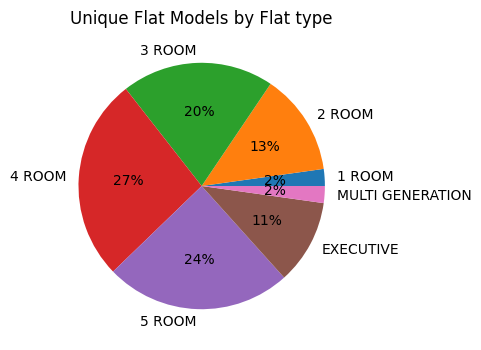

In [111]:
#group by 'flat_type' and count unique'flat_model' 
temp=pd.DataFrame(df.groupby('flat_type')['flat_model'].nunique()).reset_index()

#rename the columns for clarity
temp.columns=['flat_type','unique_flat_models']

print(temp)

#plotting the pie chart
plt.figure(figsize=(5,4))
plt.pie(temp['unique_flat_models'],labels=temp['flat_type'],autopct='%.0f%%')
plt.title('Unique Flat Models by Flat type')
plt.show()

<Axes: title={'center': 'Floor area distribution of flat type'}, xlabel='flat_type', ylabel='floor_area_sqm'>

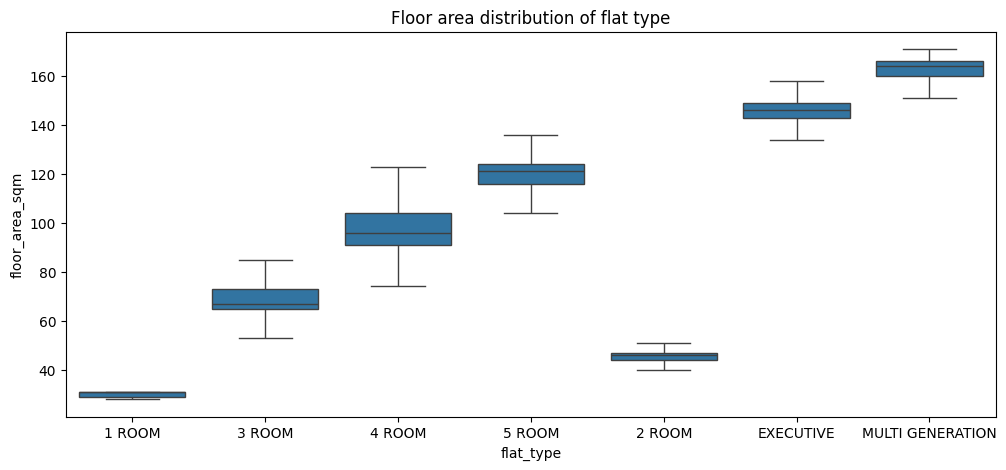

In [112]:
import seaborn as sns
plt.figure(figsize=(12,5))
plt.title('Floor area distribution of flat type')
sns.boxplot(x='flat_type',y='floor_area_sqm',data=df,showfliers=False)

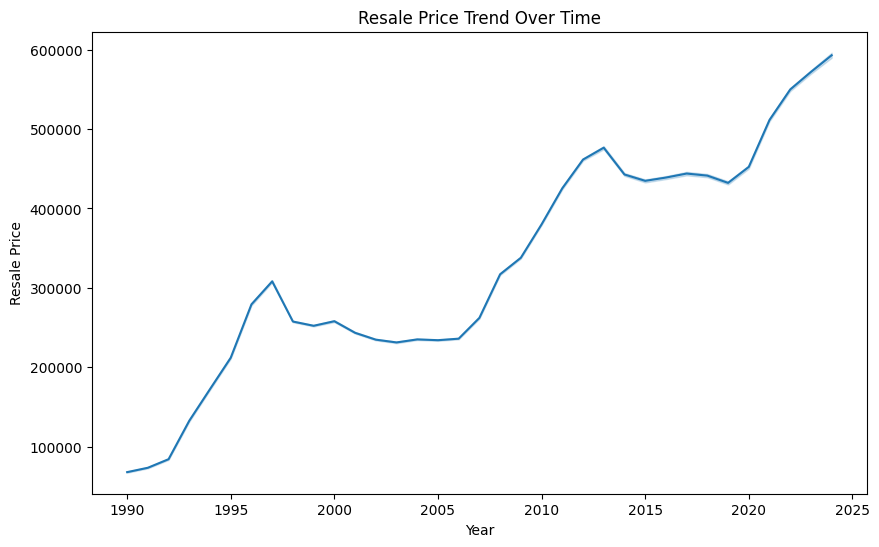

In [113]:
#Resale Price Trend Over Time
plt.figure(figsize=(10,6))
sns.lineplot(x='reg_year',y='resale_price',data=df)
plt.title('Resale Price Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Resale Price')
plt.show()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 926819 entries, 0 to 180615
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   month                  926819 non-null  object 
 1   town                   926819 non-null  object 
 2   flat_type              926819 non-null  object 
 3   block                  926819 non-null  int32  
 4   storey_range           926819 non-null  object 
 5   floor_area_sqm         926819 non-null  float64
 6   flat_model             926819 non-null  object 
 7   lease_commence_date    926819 non-null  int64  
 8   resale_price           926819 non-null  float64
 9   reg_year               926819 non-null  int64  
 10  reg_month              926819 non-null  int64  
 11  remaining_lease_year   926819 non-null  int32  
 12  remaining_lease_month  926819 non-null  int32  
dtypes: float64(2), int32(3), int64(3), object(5)
memory usage: 88.4+ MB


In [39]:
df.head()

,month,town,flat_type,block,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,reg_year,reg_month,remaining_lease_year,remaining_lease_month
0,1990-01,ANG MO KIO,1 ROOM,309,10 TO 12,31.0,IMPROVED,1977,9000.0,1990,1,0,0
1,1990-01,ANG MO KIO,1 ROOM,309,04 TO 06,31.0,IMPROVED,1977,6000.0,1990,1,0,0
2,1990-01,ANG MO KIO,1 ROOM,309,10 TO 12,31.0,IMPROVED,1977,8000.0,1990,1,0,0
3,1990-01,ANG MO KIO,1 ROOM,309,07 TO 09,31.0,IMPROVED,1977,6000.0,1990,1,0,0
4,1990-01,ANG MO KIO,3 ROOM,216,04 TO 06,73.0,NEW GENERATION,1976,47200.0,1990,1,0,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 926819 entries, 0 to 180615
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   month                  926819 non-null  object 
 1   town                   926819 non-null  object 
 2   flat_type              926819 non-null  object 
 3   block                  926819 non-null  int32  
 4   storey_range           926819 non-null  object 
 5   floor_area_sqm         926819 non-null  float64
 6   flat_model             926819 non-null  object 
 7   lease_commence_date    926819 non-null  int64  
 8   resale_price           926819 non-null  float64
 9   reg_year               926819 non-null  int64  
 10  reg_month              926819 non-null  int64  
 11  remaining_lease_year   926819 non-null  int32  
 12  remaining_lease_month  926819 non-null  int32  
dtypes: float64(2), int32(3), int64(3), object(5)
memory usage: 88.4+ MB


<Axes: ylabel='town'>

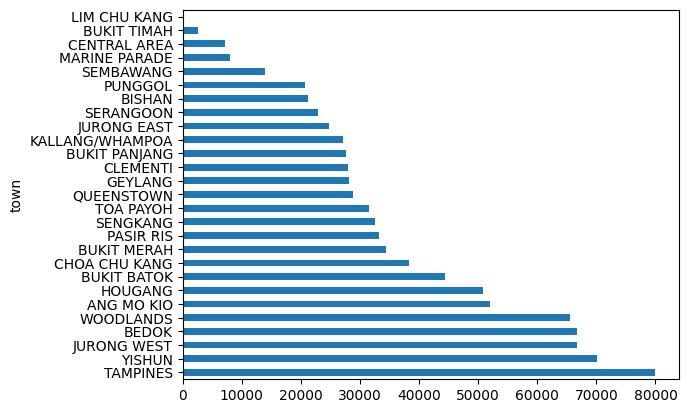

In [118]:
#perform univariate analysis with bar plot
df['town'].value_counts().plot.barh()

<Axes: ylabel='flat_type'>

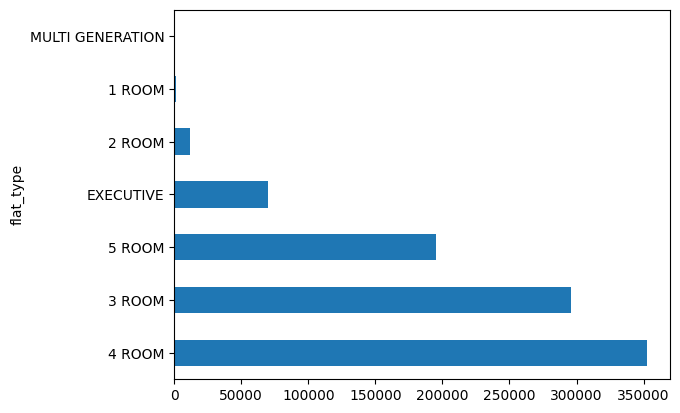

In [119]:
#perform UA on flat_type with a barplot
df['flat_type'].value_counts().plot.barh()

<Axes: xlabel='storey_range'>

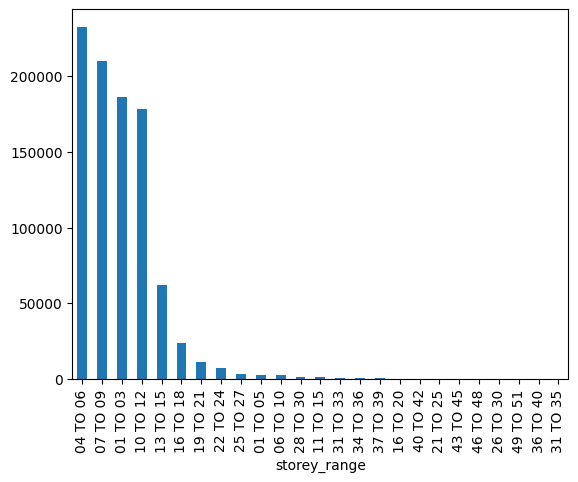

In [120]:
#perform UA with bar plot
df['storey_range'].value_counts().plot.bar()

<Axes: ylabel='flat_model'>

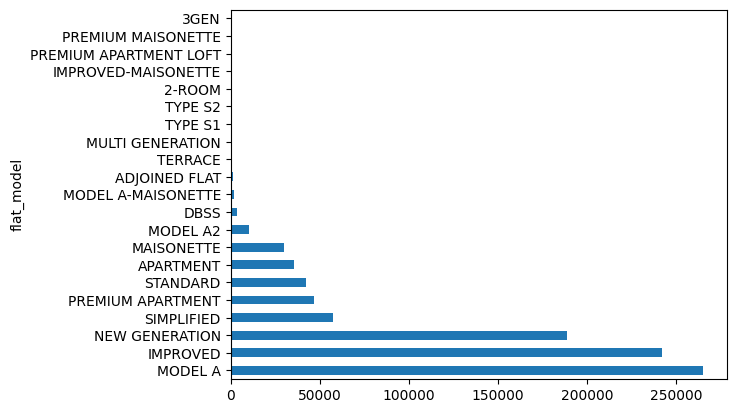

In [121]:
df['flat_model'].value_counts().plot.barh()

In [122]:
df.head()

,month,town,flat_type,block,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,reg_year,reg_month,remaining_lease_year,remaining_lease_month
0,1990-01,ANG MO KIO,1 ROOM,309,10 TO 12,31.0,IMPROVED,1977,9000.0,1990,1,0,0
1,1990-01,ANG MO KIO,1 ROOM,309,04 TO 06,31.0,IMPROVED,1977,6000.0,1990,1,0,0
2,1990-01,ANG MO KIO,1 ROOM,309,10 TO 12,31.0,IMPROVED,1977,8000.0,1990,1,0,0
3,1990-01,ANG MO KIO,1 ROOM,309,07 TO 09,31.0,IMPROVED,1977,6000.0,1990,1,0,0
4,1990-01,ANG MO KIO,3 ROOM,216,04 TO 06,73.0,NEW GENERATION,1976,47200.0,1990,1,0,0


<Axes: ylabel='reg_month'>

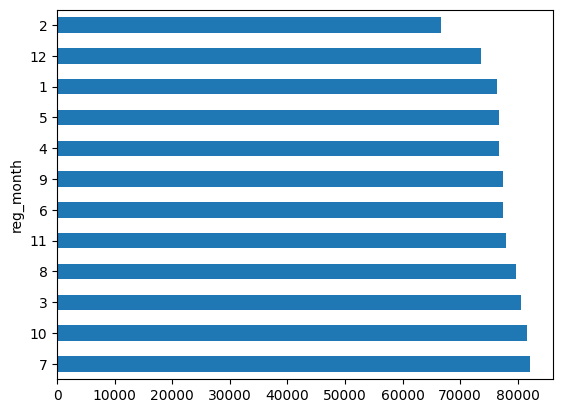

In [41]:
df['reg_month'].value_counts().plot.barh()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 926819 entries, 0 to 180615
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   month                  926819 non-null  object 
 1   town                   926819 non-null  object 
 2   flat_type              926819 non-null  object 
 3   block                  926819 non-null  int32  
 4   storey_range           926819 non-null  object 
 5   floor_area_sqm         926819 non-null  float64
 6   flat_model             926819 non-null  object 
 7   lease_commence_date    926819 non-null  int64  
 8   resale_price           926819 non-null  float64
 9   reg_year               926819 non-null  int64  
 10  reg_month              926819 non-null  int64  
 11  remaining_lease_year   926819 non-null  int32  
 12  remaining_lease_month  926819 non-null  int32  
dtypes: float64(2), int32(3), int64(3), object(5)
memory usage: 88.4+ MB


In [43]:
df.drop(columns='month',inplace=True)

In [44]:
# convert 'flat_model','flat_type','town' to numeric
label_encoder=LabelEncoder()

for column in ['flat_model','flat_type','town','storey_range']:
    df[column]=label_encoder.fit_transform(df[column])

In [45]:
import seaborn as sns

In [128]:
#detecting skewed columns using plot
def plot(df,column):
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[column])
    plt.title(f"Box plot for {column}")
    plt.show()

In [129]:
df.columns

Index(['town', 'flat_type', 'block', 'storey_range', 'floor_area_sqm',
       'flat_model', 'lease_commence_date', 'resale_price', 'reg_year',
       'reg_month', 'remaining_lease_year', 'remaining_lease_month'],
      dtype='object')

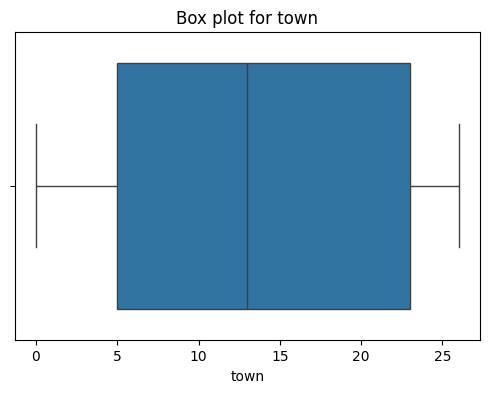

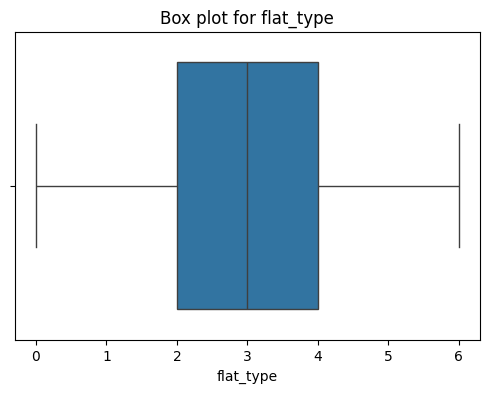

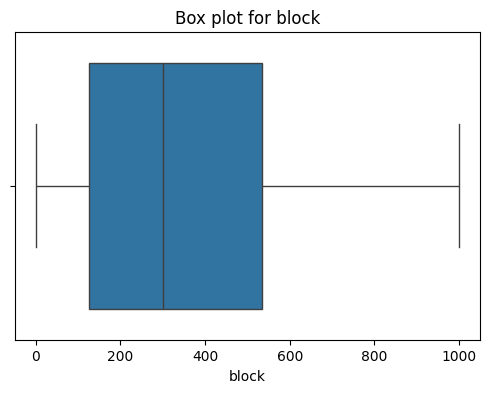

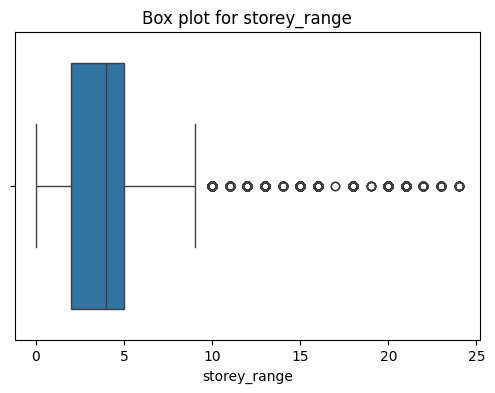

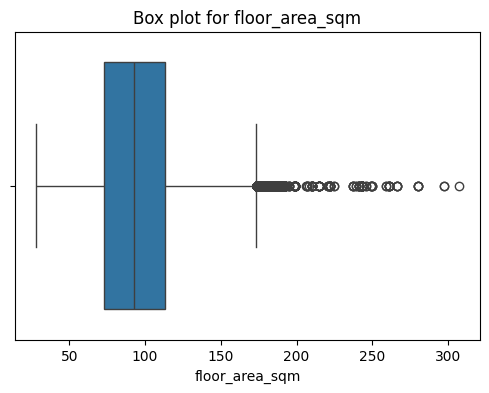

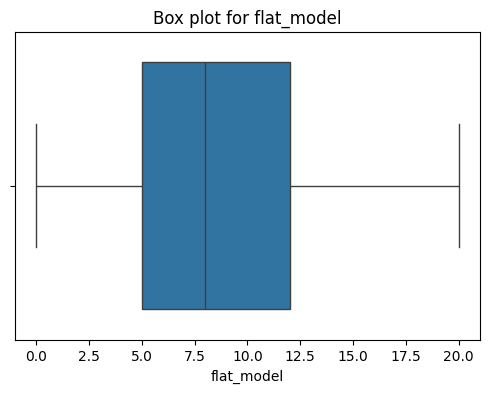

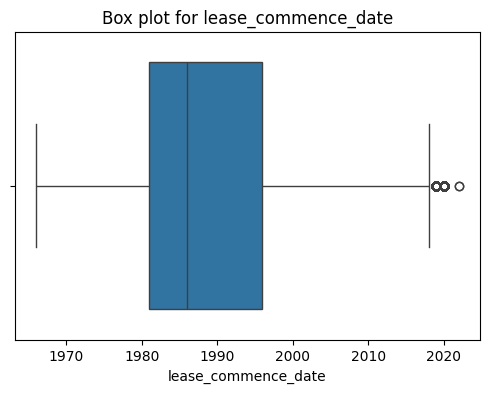

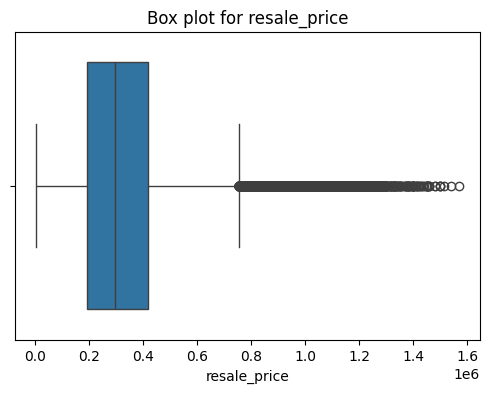

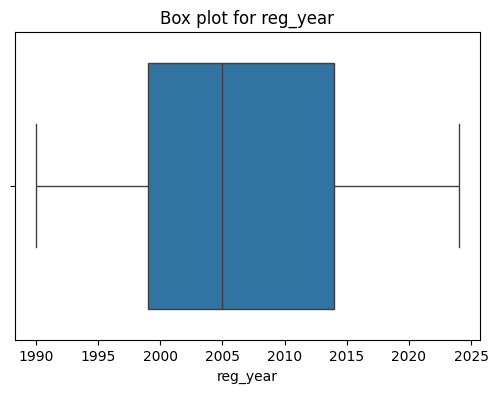

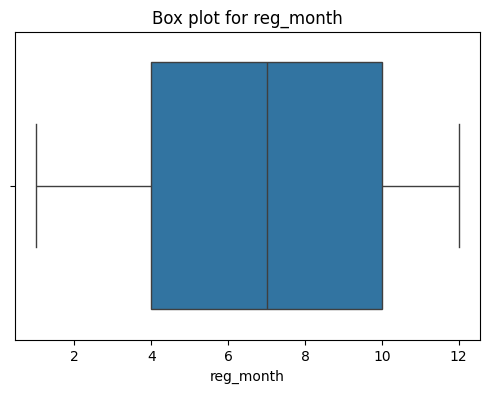

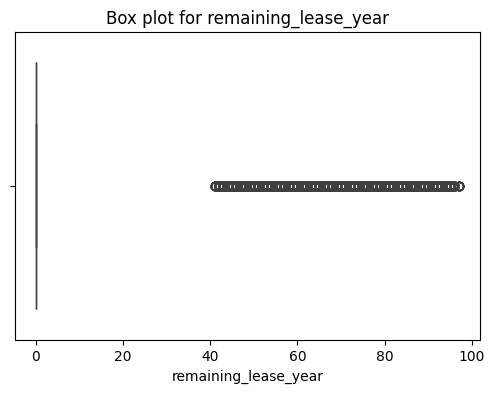

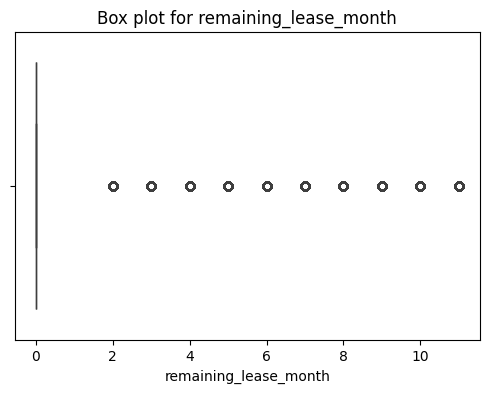

In [130]:
for i in df.columns:
    plot(df,i)

In [46]:
df.head()

,town,flat_type,block,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,reg_year,reg_month,remaining_lease_year,remaining_lease_month
0,0,0,309,5,31.0,5,1977,9000.0,1990,1,0,0
1,0,0,309,2,31.0,5,1977,6000.0,1990,1,0,0
2,0,0,309,5,31.0,5,1977,8000.0,1990,1,0,0
3,0,0,309,4,31.0,5,1977,6000.0,1990,1,0,0
4,0,2,216,2,73.0,12,1976,47200.0,1990,1,0,0


In [47]:
df['remaining_lease_year'].unique()

array([ 0, 61, 60, 62, 63, 58, 59, 93, 94, 78, 70, 67, 68, 56, 66, 65, 69,
       64, 83, 87, 71, 92, 54, 82, 75, 55, 74, 72, 80, 86, 79, 53, 57, 52,
       51, 95, 90, 81, 85, 84, 77, 88, 49, 50, 89, 73, 48, 76, 91, 96, 47,
       46, 45, 97, 44, 43, 42, 41])

In [48]:
df['floor_area_sqm'].unique()

array([ 31. ,  73. ,  67. ,  82. ,  74. ,  88. ,  89. ,  83. ,  68. ,
        75. ,  81. ,  91. ,  92. ,  97. ,  90. ,  98. ,  99. , 100. ,
        93. , 103. , 119. , 120. , 118. , 121. , 135. , 117. ,  45. ,
        65. ,  59. ,  70. ,  76. ,  84. , 104. , 105. , 125. , 132. ,
       139. , 123. , 143. , 151. ,  69. , 106. , 107. , 116. , 149. ,
       141. , 146. , 148. , 145. , 154. , 150. ,  29. ,  51. ,  61. ,
        63. ,  64. ,  72. ,  58. ,  66. ,  60. ,  53. ,  54. ,  56. ,
        77. , 133. , 131. , 115. ,  43. ,  38. ,  41. ,  85. , 111. ,
       101. , 112. , 137. , 127. , 147. , 163. ,  50. ,  40. ,  60.3,
        62. ,  55. ,  57. ,  52. ,  63.1, 102. ,  83.1, 126. , 140. ,
       142. ,  71. , 108. , 144. ,  96. , 114. , 157. , 152. , 155. ,
        87. , 109. , 110. ,  94. , 134. , 122. , 128. ,  78. ,  46. ,
        42. ,  49. ,  47. ,  86. , 156. ,  79. ,  80. , 124. ,  28. ,
       113. ,  95. , 160. , 136. ,  48. , 138. , 161. ,  39. , 130. ,
       159. , 206. ,

In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
town,926819.0,13.652880,8.795791,0.0,5.0,13.0,23.0,26.0
flat_type,926819.0,3.013886,0.948403,0.0,2.0,3.0,4.0,6.0
block,926819.0,348.744901,255.134131,1.0,127.0,302.0,534.0,999.0
storey_range,926819.0,3.409396,2.663548,0.0,2.0,4.0,5.0,24.0
floor_area_sqm,926819.0,95.691725,25.825830,28.0,73.0,93.0,113.0,307.0
flat_model,926819.0,8.990056,3.861574,0.0,5.0,8.0,12.0,20.0
lease_commence_date,926819.0,1988.271432,10.657764,1966.0,1981.0,1986.0,1996.0,2022.0
resale_price,926819.0,320640.546983,170322.597002,5000.0,193000.0,297000.0,418000.0,1568888.0
reg_year,926819.0,2006.161966,9.316127,1990.0,1999.0,2005.0,2014.0,2024.0
reg_month,926819.0,6.551098,3.414128,1.0,4.0,7.0,10.0,12.0


In [50]:
# checking the duplicate values
df.duplicated().sum()

2096

In [51]:
df1= df.drop_duplicates()
df1.reset_index(drop= True, inplace= True)

In [52]:
df.columns

Index(['town', 'flat_type', 'block', 'storey_range', 'floor_area_sqm',
       'flat_model', 'lease_commence_date', 'resale_price', 'reg_year',
       'reg_month', 'remaining_lease_year', 'remaining_lease_month'],
      dtype='object')

In [68]:
df.head()

,town,flat_type,block,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,reg_year,reg_month,remaining_lease_year,remaining_lease_month
0,0,0,309,5,31.0,5,1977,9000.0,1990,1,0,0
1,0,0,309,2,31.0,5,1977,6000.0,1990,1,0,0
2,0,0,309,5,31.0,5,1977,8000.0,1990,1,0,0
3,0,0,309,4,31.0,5,1977,6000.0,1990,1,0,0
4,0,2,216,2,73.0,12,1976,47200.0,1990,1,0,0


In [55]:
df['reg_month'].value_counts()

reg_month
7     82050
10    81594
3     80586
8     79738
11    77933
6     77464
9     77380
4     76772
5     76700
1     76349
12    73582
2     66671
Name: count, dtype: int64

In [58]:
df['reg_year'].min()

1990

In [59]:
df['reg_year'].max()

2024

In [60]:
df['remaining_lease_month'].value_counts()

remaining_lease_month
0     775734
11     15755
9      15389
10     15293
2      15100
3      15085
6      14923
7      14912
5      14910
8      14899
4      14819
Name: count, dtype: int64

In [61]:
df['remaining_lease_year'].value_counts()

remaining_lease_year
0     746203
94     15182
93      8592
95      6125
65      5821
64      5789
63      5405
92      5351
66      5209
62      5153
78      4976
61      4829
79      4682
77      4599
60      4536
76      4363
80      4120
67      4049
74      3887
75      3824
81      3799
91      3774
59      3574
73      3461
68      3411
82      3348
56      3273
58      3180
69      3095
57      3077
55      2952
90      2847
70      2818
83      2752
72      2716
54      2646
71      2465
53      2144
84      2084
89      2025
52      1739
85      1728
88      1703
51      1460
86      1293
87      1273
50      1224
49       945
48       831
47       706
46       619
45       480
44       297
43       153
42       105
96        84
41        27
97        16
Name: count, dtype: int64

In [62]:
df['remaining_lease_year'].min()

0

In [63]:
df['remaining_lease_year'].max()

97

In [64]:
df['lease_commence_date'].value_counts()

lease_commence_date
1985    87435
1984    63464
1988    50731
1987    42852
1978    41343
1986    38617
1989    32237
1980    32022
1997    30996
1979    30973
1993    28199
1996    28113
1998    25679
1983    23115
1976    21542
1981    20948
1999    20895
1977    20746
1992    20243
2001    19509
1995    19026
2000    18393
1975    17389
2003    15758
1974    14566
1982    13336
2002    12592
1970    11446
2015    10169
1990     9281
1973     8617
2004     8462
1969     8376
1971     7875
1994     6562
2016     6337
1967     6191
1972     5819
2018     5553
2013     5506
2017     5274
2012     4976
2005     4033
2014     3738
2006     3198
2011     2676
2008     2146
2019     2143
1968     1870
2009     1789
2010     1371
1991     1250
2007      993
2020      413
1966       34
2022        2
Name: count, dtype: int64

In [66]:
df['lease_commence_date'].min()

1966

In [67]:
df['lease_commence_date'].max()

2022

In [69]:
df['block'].value_counts()

block
2      5142
1      4849
101    3716
110    3662
4      3589
       ... 
991      33
995      27
378      25
999      25
380      21
Name: count, Length: 986, dtype: int64

In [70]:
df['block'].min()

1

In [71]:
df['block'].max()

999

In [72]:
df.columns

Index(['town', 'flat_type', 'block', 'storey_range', 'floor_area_sqm',
       'flat_model', 'lease_commence_date', 'resale_price', 'reg_year',
       'reg_month', 'remaining_lease_year', 'remaining_lease_month'],
      dtype='object')

In [79]:
df['floor_area_sqm'].value_counts()

floor_area_sqm
67.0     69323
104.0    47195
68.0     40051
84.0     36121
92.0     30517
         ...  
75.9         1
69.2         1
152.4        1
131.1        1
189.4        1
Name: count, Length: 212, dtype: int64

In [80]:
df['floor_area_sqm'].min()

28.0

In [81]:
df['floor_area_sqm'].max()

307.0

# Skewness handling

In [73]:
df6=df1.copy()

In [74]:
df6.columns

Index(['town', 'flat_type', 'block', 'storey_range', 'floor_area_sqm',
       'flat_model', 'lease_commence_date', 'resale_price', 'reg_year',
       'reg_month', 'remaining_lease_year', 'remaining_lease_month'],
      dtype='object')

skewness columns are:
floor_area_sqm,resale_price

In [75]:
df6['floor_area_sqm']=(df6['floor_area_sqm']).apply(lambda x:np.log(x) if x>0 else np.nan).fillna(0)
df6['resale_price']=(df6['resale_price']).apply(lambda x:np.log(x) if x>0 else np.nan).fillna(0)


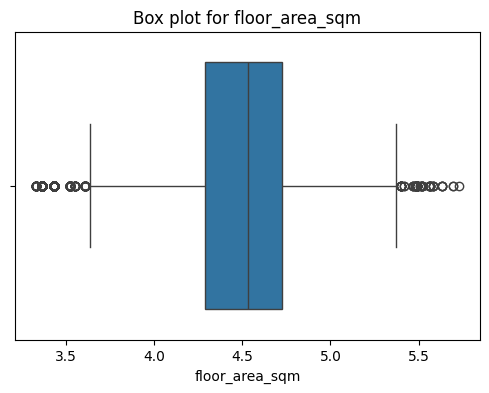

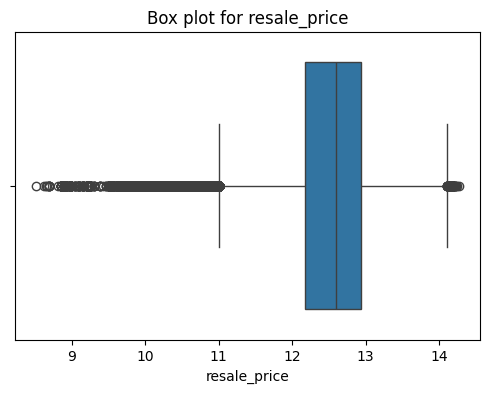

In [140]:
skewed_columns=['floor_area_sqm','resale_price']
for i in skewed_columns:
    plot(df6,i)

In [141]:
#outlier handling-iqr method

In [76]:
def outlier(df,column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    upper_threshold=q3+(1.5*iqr)
    lower_threshold=q1-(1.5*iqr)
    df[column]=df[column].clip(lower_threshold,upper_threshold)
    

In [77]:
outlier(df6,'floor_area_sqm')
outlier(df6,'resale_price')


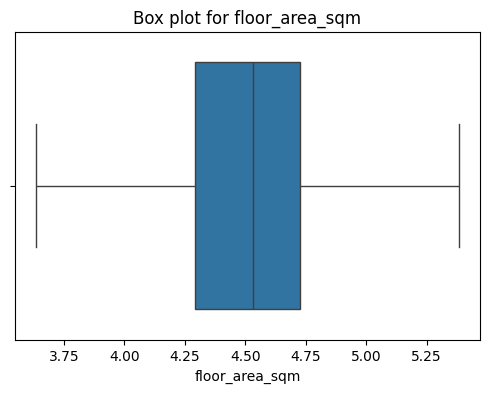

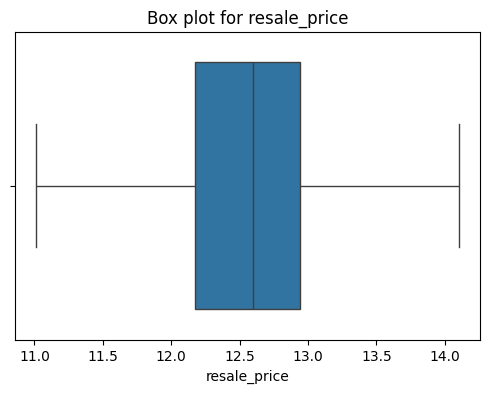

In [144]:
for i in skewed_columns:
    plot(df6,i)

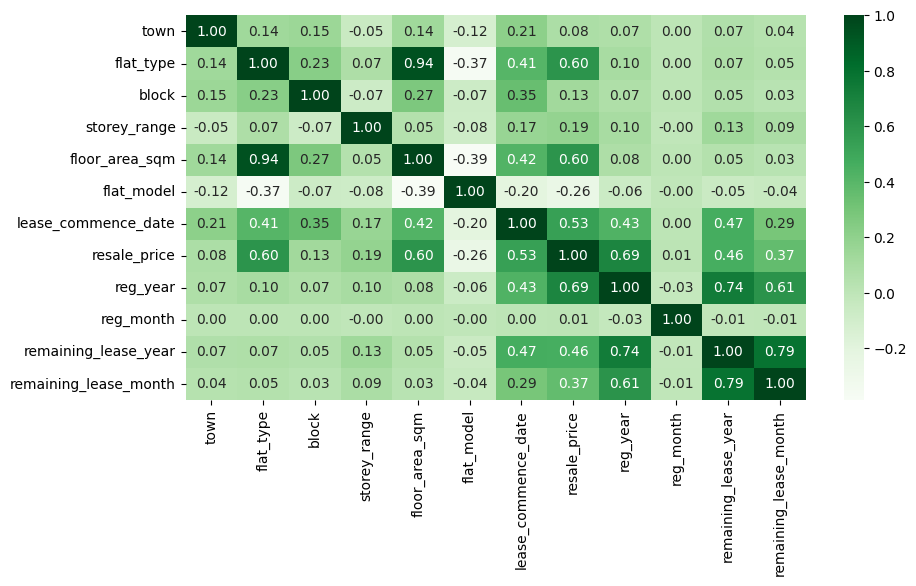

In [145]:
#checking correlation after outlier correction
plt.figure(figsize=(10,5))
sns.heatmap(df6.corr(),annot=True,cmap="Greens",fmt="0.2f")
plt.show()

In [146]:
df6.columns

Index(['town', 'flat_type', 'block', 'storey_range', 'floor_area_sqm',
       'flat_model', 'lease_commence_date', 'resale_price', 'reg_year',
       'reg_month', 'remaining_lease_year', 'remaining_lease_month'],
      dtype='object')

In [78]:
df6['floor_area_sqm'].value_counts()

floor_area_sqm
4.204693    69089
4.644391    47116
4.219508    39907
4.430817    36043
4.521789    30422
            ...  
4.291828        1
4.247066        1
4.316154        1
4.314818        1
5.243861        1
Name: count, Length: 192, dtype: int64

In [83]:
#split the data
X=df6[['town', 'flat_type', 'block',  'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 
       'reg_year', 'reg_month', 'remaining_lease_year',
       'remaining_lease_month']]
y=df6['resale_price']

In [85]:
from sklearn import metrics
import numpy as np
from sklearn.model_selection import train_test_split

In [152]:
from sklearn import metrics
import numpy as np
from sklearn.model_selection import train_test_split

def machine_regression(X,y,algorithm):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)
    
    model=algorithm().fit(X_train,y_train)
    
    y_pred_test=model.predict(X_test)
    
    mae=metrics.mean_absolute_error(y_test,y_pred_test)
    mse=metrics.mean_squared_error(y_test,y_pred_test)
    rmse=np.sqrt(mse)
    r2_score=model.score(X_test,y_test)
    
    evaluation_metrics={
        'algorithm':algorithm.__name__,
        'mae_test':mae,
        'mse_test':mse,
        'rmse_test':rmse,
        'r2_score_test':r2_score
    }
    
    return evaluation_metrics

In [82]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

In [160]:
print(machine_regression(X,y, LinearRegression))
print(machine_regression(X,y, DecisionTreeRegressor))
print(machine_regression(X,y, RandomForestRegressor))
print(machine_regression(X,y, AdaBoostRegressor))
print(machine_regression(X,y, GradientBoostingRegressor))
print(machine_regression(X,y, XGBRegressor))

{'algorithm': 'LinearRegression', 'mae_test': 0.20349075316548315, 'mse_test': 0.06698627672705636, 'rmse_test': 0.25881707193895914, 'r2_score_test': 0.7979679124030966}
{'algorithm': 'DecisionTreeRegressor', 'mae_test': 0.06554566763177609, 'mse_test': 0.009341831672530925, 'rmse_test': 0.09665315138437508, 'r2_score_test': 0.9718248296965283}
{'algorithm': 'RandomForestRegressor', 'mae_test': 0.049259317253067016, 'mse_test': 0.005179274510244609, 'rmse_test': 0.07196717661715381, 'r2_score_test': 0.9843791938786843}
{'algorithm': 'AdaBoostRegressor', 'mae_test': 0.17864912679113865, 'mse_test': 0.0496167738631335, 'rmse_test': 0.22274822976430925, 'r2_score_test': 0.8503547160228495}
{'algorithm': 'GradientBoostingRegressor', 'mae_test': 0.101016814621511, 'mse_test': 0.017395506465212086, 'rmse_test': 0.13189202578325987, 'r2_score_test': 0.9475347689454023}
{'algorithm': 'XGBRegressor', 'mae_test': 0.05644048121955599, 'mse_test': 0.005984118021813802, 'rmse_test': 0.077357081264

In [72]:
print(machine_regression(X,y, LinearRegression))
print(machine_regression(X,y, DecisionTreeRegressor))
print(machine_regression(X,y, RandomForestRegressor))
print(machine_regression(X,y, AdaBoostRegressor))
print(machine_regression(X,y, GradientBoostingRegressor))
print(machine_regression(X,y, XGBRegressor))

{'algorithm': 'LinearRegression', 'mae_test': 0.20345611716128972, 'mse_test': 0.0669786285411529, 'rmse_test': 0.2588022962439725, 'r2_score_test': 0.7979194793007128}
{'algorithm': 'DecisionTreeRegressor', 'mae_test': 0.06512458455702377, 'mse_test': 0.009207047593428178, 'rmse_test': 0.09595336155355985, 'r2_score_test': 0.9722215128570464}
{'algorithm': 'RandomForestRegressor', 'mae_test': 0.048757527261004, 'mse_test': 0.005060537426437629, 'rmse_test': 0.07113745445570588, 'r2_score_test': 0.9847319053789759}
{'algorithm': 'AdaBoostRegressor', 'mae_test': 0.17775882255422548, 'mse_test': 0.04901402571715978, 'rmse_test': 0.22139111481077955, 'r2_score_test': 0.852120294872771}
{'algorithm': 'GradientBoostingRegressor', 'mae_test': 0.09982188242070011, 'mse_test': 0.017003850248773423, 'rmse_test': 0.13039881229817019, 'r2_score_test': 0.9486978609892914}
{'algorithm': 'XGBRegressor', 'mae_test': 0.05571036136887668, 'mse_test': 0.005834147513066248, 'rmse_test': 0.076381591454134

In [161]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

model=RandomForestRegressor().fit(X_train,y_train)

y_pred_test=model.predict(X_test)

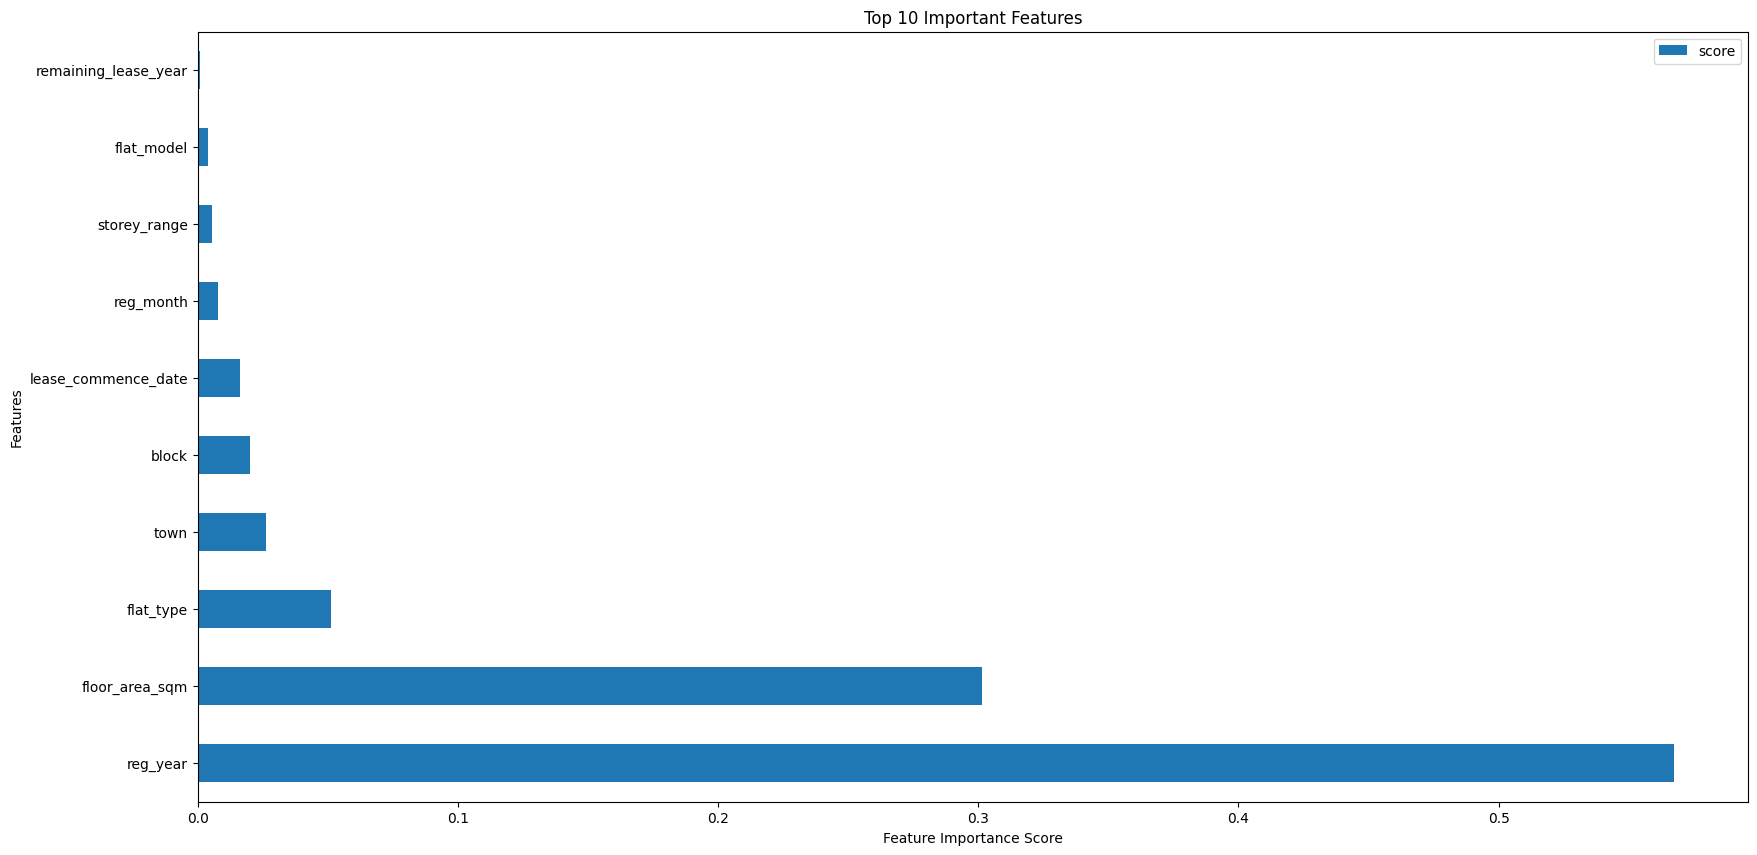

In [162]:
feature_importances=model.feature_importances_
features=X_train.columns
data=pd.DataFrame(data=feature_importances,index=features,columns=['score'])

top_features=data.nlargest(10,columns='score')

top_features.plot(kind='barh',figsize=(20,10))
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Top 10 Important Features')
plt.show()

In [89]:
import pickle

In [164]:
with open("resale.pkl","wb") as f:
    pickle.dump(model,f)

In [87]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

model2=DecisionTreeRegressor().fit(X_train,y_train)

y_pred_test=model2.predict(X_test)

In [90]:
with open("resale2.pkl","wb") as f:
    pickle.dump(model2,f)